In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
turnsile = pd.read_csv("./turnstile_160312.txt", low_memory=False)
turnsile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196533 entries, 0 to 196532
Data columns (total 11 columns):
C/A                                                                     196533 non-null object
UNIT                                                                    196533 non-null object
SCP                                                                     196533 non-null object
STATION                                                                 196533 non-null object
LINENAME                                                                196533 non-null object
DIVISION                                                                196533 non-null object
DATE                                                                    196533 non-null object
TIME                                                                    196533 non-null object
DESC                                                                    196533 non-null object
ENTRIES                           

In [3]:
turnsile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,03:00:00,REGULAR,5572932,1881244
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,07:00:00,REGULAR,5572952,1881260
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,11:00:00,REGULAR,5573054,1881365
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,15:00:00,REGULAR,5573287,1881447
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,19:00:00,REGULAR,5573690,1881529


In [4]:
turnsile[turnsile.STATION.str.contains("CORTLANDT ST")].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
8356,A049,R088,02-00-00,CORTLANDT ST,R,BMT,03/05/2016,00:00:00,REGULAR,118998,44554
8357,A049,R088,02-00-00,CORTLANDT ST,R,BMT,03/05/2016,04:00:00,REGULAR,119005,44554
8358,A049,R088,02-00-00,CORTLANDT ST,R,BMT,03/05/2016,08:00:00,REGULAR,119012,44564
8359,A049,R088,02-00-00,CORTLANDT ST,R,BMT,03/05/2016,12:00:00,REGULAR,119047,44594
8360,A049,R088,02-00-00,CORTLANDT ST,R,BMT,03/05/2016,16:00:00,REGULAR,119135,44616


In [5]:
geodata = pd.read_csv("geocoded.csv", names=["UNIT", "C/A", "STATION", "LINENAME", "DIVISION", "LAT", "LONG"])
geodata.head()

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LONG
0,R470,X002,ELTINGVILLE PK,Z,SRT,40.544600,-74.164581
1,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533
2,R165,S102,TOMPKINSVILLE,1,SRT,40.636948,-74.074824
3,R070,S101,ST. GEORGE,1,SRT,40.643738,-74.073622
4,R070,S101A,ST. GEORGE,1,SRT,40.643738,-74.073622


In [6]:
geodata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 7 columns):
UNIT        768 non-null object
C/A         768 non-null object
STATION     768 non-null object
LINENAME    768 non-null object
DIVISION    768 non-null object
LAT         750 non-null float64
LONG        750 non-null float64
dtypes: float64(2), object(5)
memory usage: 48.0+ KB


In [7]:
clean_data = pd.merge(turnsile, geodata, how='left', on=["C/A", "UNIT"], indicator=True)

In [10]:
clean_data.head()

,C/A,UNIT,SCP,STATION_x,LINENAME_x,DIVISION_x,DATE,TIME,DESC,ENTRIES,EXITS,STATION_y,LINENAME_y,DIVISION_y,LAT,LONG,_merge
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,03:00:00,REGULAR,5572932,1881244,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,07:00:00,REGULAR,5572952,1881260,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,11:00:00,REGULAR,5573054,1881365,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,15:00:00,REGULAR,5573287,1881447,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,19:00:00,REGULAR,5573690,1881529,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both


In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196533 entries, 0 to 196532
Data columns (total 17 columns):
C/A                                                                     196533 non-null object
UNIT                                                                    196533 non-null object
SCP                                                                     196533 non-null object
STATION_x                                                               196533 non-null object
LINENAME_x                                                              196533 non-null object
DIVISION_x                                                              196533 non-null object
DATE                                                                    196533 non-null object
TIME                                                                    196533 non-null object
DESC                                                                    196533 non-null object
ENTRIES                           

In [12]:
clean_data._merge.value_counts()

both          191121
left_only       5412
right_only         0
dtype: int64

In [13]:
clean_data['key'] = clean_data['C/A'] + clean_data['UNIT']

In [12]:
error = clean_data[clean_data._merge == "left_only"]

In [13]:
error.shape

(5412, 18)

In [14]:
keys_of_missing = error.key.unique()

list_of_keys = [i for i in keys_of_missing]

In [15]:
len(list_of_keys)

11

In [16]:
grp_by_df = error.groupby(['DIVISION_x', 'key', 'STATION_x']).count()
grp_by_df

C/A  UNIT  SCP  LINENAME_x  DATE  TIME  \
DIVISION_x key       STATION_x                                                 
BMT        A049R088  CORTLANDT ST     624   624  624         624   624   624   
           A077R028  FULTON ST        168   168  168         168   168   168   
           A081R028  FULTON ST        294   294  294         294   294   294   
           A082R028  FULTON ST        168   168  168         168   168   168   
IND        N095AR014 FULTON ST        559   559  559         559   559   559   
           N098R028  FULTON ST        491   491  491         491   491   491   
           N330R202  63 DR-REGO PARK  378   378  378         378   378   378   
IRT        R101R001  SOUTH FERRY      630   630  630         630   630   630   
           R169R168  96 ST            672   672  672         672   672   672   
           R550R072  34 ST-HUDSON YD  756   756  756         756   756   756   
           R612R057  ATL AV-BARCLAY   672   672  672         672   672   672   

                                      DESC  ENTRIES  \
DIVISION_x key       STATION_x                        
BMT        A049R088  CORTLANDT ST      624      624   
           A077R028  FULTON ST         168      168   
           A081R028  FULTON ST         294      294   
           A082R028  FULTON ST         168      168   
IND        N095AR014 FULTON ST         559      559   
           N098R028  FULTON ST         491      491   
           N330R202  63 DR-REGO PARK   378      378   
IRT        R101R001  SOUTH FERRY       630      630   
           R169R168  96 ST             672      672   
           R550R072  34 ST-HUDSON YD   756      756   
           R612R057  ATL AV-BARCLAY    672      672   

                                      EXITS                                                                 \
DIVISION_x key       STATION_x                                                                               
BMT        A049R088  CORTLANDT ST                                                   624                      
           A077R028  FULTON ST                                                      168                      
           A081R028  FULTON ST                                                      294                      
           A082R028  FULTON ST                                                      168                      
IND        N095AR014 FULTON ST                                                      559                      
           N098R028  FULTON ST                                                      491                      
           N330R202  63 DR-REGO PARK                                                378                      
IRT        R101R001  SOUTH FERRY                                                    630                      
           R169R168  96 ST                                                          672                      
           R550R072  34 ST-HUDSON YD                                                756                      
           R612R057  ATL AV-BARCLAY                                                 672                      

                                      STATION_y  LINENAME_y  DIVISION_y  LAT  \
DIVISION_x key       STATION_x                                                 
BMT        A049R088  CORTLANDT ST             0           0           0    0   
           A077R028  FULTON ST                0           0           0    0   
           A081R028  FULTON ST                0           0           0    0   
           A082R028  FULTON ST                0           0           0    0   
IND        N095AR014 FULTON ST                0           0           0    0   
           N098R028  FULTON ST                0           0           0    0   
           N330R202  63 DR-REGO PARK          0           0           0    0   
IRT        R101R001  SOUTH FERRY              0           0           0    0   
           R169R168  96 ST                    0   

In [17]:
list_to_search = [i[2] for i in grp_by_df.index]

In [18]:
def search_wikipedia(query):
    subway_query = query + " (New York City Subway)"
    print(subway_query)
    results = wikipedia.search(subway_query)
    print(results)
    print()
    return results

In [19]:
codebook = {}
codebook['UNIT'] =  []

In [20]:
import re

In [21]:
list_of_keys = [i for i in keys_of_missing]

In [22]:
names = error['DIVISION_x'] + " " +  error['STATION_x']
names = [re.sub('\W', ' ', i) for i in names]

In [23]:
# list_to_search = [name for name in np.unique(names)] 
# list_to_search = [name for name in grp_by_df[]]

In [24]:
import wikipedia

In [25]:
names = []
for i in list_to_search:
    names.append(i)
    search_wikipedia(i)

CORTLANDT ST (New York City Subway)
['New York City Subway', 'Van Cortlandt Park', '1 (New York City Subway service)', 'Van Cortlandt Park – 242nd Street (IRT Broadway – Seventh Avenue Line)', 'Cortlandt Street (BMT Broadway Line)', 'J/Z (New York City Subway service)', 'N (New York City Subway service)', '4 (New York City Subway service)', '9 (New York City Subway service)', 'C (New York City Subway service)']

FULTON ST (New York City Subway)
['Fulton Street (New York City Subway)', 'New York City Subway', 'C (New York City Subway service)', 'Fulton Street', 'Hoyt–Schermerhorn Streets (New York City Subway)', 'Franklin Avenue – Fulton Street (New York City Subway)', 'A (New York City Subway service)', 'Fulton Street (Brooklyn)', 'J/Z (New York City Subway service)', 'Jay Street – MetroTech (New York City Subway)']

FULTON ST (New York City Subway)
['Fulton Street (New York City Subway)', 'New York City Subway', 'C (New York City Subway service)', 'Fulton Street', 'Hoyt–Schermerhorn S

In [26]:
for i, v in zip(names, list_of_keys):
    print(i, v)

CORTLANDT ST A049R088
FULTON ST A077R028
FULTON ST A081R028
FULTON ST A082R028
FULTON ST N095AR014
FULTON ST N098R028
63 DR-REGO PARK N330R202
SOUTH FERRY R101R001
96 ST R169R168
34 ST-HUDSON YD R550R072
ATL AV-BARCLAY R612R057


In [27]:
# names = ['BMT_CORTLANDT_ST',
#                 'BMT_FULTON_ST',
#                 'IND_63_DR_REGO_PARK',
#                 'IND_FULTON_ST',
#                 'IRT_34_ST_HUDSON_YD',
#                 'IRT_96_ST',
#                 'IRT_ATL_AV_BARCLAY',
#                 'IRT_SOUTH_FERRY']

queries = ['Cortlandt Street (BMT Broadway Line)',
                'Fulton Street (New York City Subway)',
                'Fulton Street (New York City Subway)',
                'Fulton Street (New York City Subway)',
                'Fulton Street (New York City Subway)',
                'Fulton Street (New York City Subway)',
                '63rd Drive – Rego Park (IND Queens Boulevard Line)', 
                'South Ferry – Whitehall Street (New York City Subway)',
                '96th Street (IRT Broadway – Seventh Avenue Line)', 
                '34th Street – Hudson Yards (IRT Flushing Line)',
                'Atlantic Avenue – Barclays Center (New York City Subway)' ]

In [28]:
for i,v,z in zip(names, list_of_keys, queries):
    print(i,v,z)

CORTLANDT ST A049R088 Cortlandt Street (BMT Broadway Line)
FULTON ST A077R028 Fulton Street (New York City Subway)
FULTON ST A081R028 Fulton Street (New York City Subway)
FULTON ST A082R028 Fulton Street (New York City Subway)
FULTON ST N095AR014 Fulton Street (New York City Subway)
FULTON ST N098R028 Fulton Street (New York City Subway)
63 DR-REGO PARK N330R202 63rd Drive – Rego Park (IND Queens Boulevard Line)
SOUTH FERRY R101R001 South Ferry – Whitehall Street (New York City Subway)
96 ST R169R168 96th Street (IRT Broadway – Seventh Avenue Line)
34 ST-HUDSON YD R550R072 34th Street – Hudson Yards (IRT Flushing Line)
ATL AV-BARCLAY R612R057 Atlantic Avenue – Barclays Center (New York City Subway)


In [29]:
recode_books = {}
for key, name, query in zip(list_of_keys, names, queries):
    wiki_page = wikipedia.page(query)
    recode_books[key] = {'name': name, 'lat': float(wiki_page.coordinates[0]), 'lon': float(wiki_page.coordinates[1])}
#     recode_books.update({'name': name, 'lat': float(wiki_page.coordinates[0]), 'lon': float(wiki_page.coordinates[1]) })
#     recode_books[name] = float(wiki_page.coordinates[0])
#     recode_books[name] = float(wiki_page.coordinates[1])
#     lats.append(float(wiki_page.coordinates[0]))
#     print(wiki_page.coordinates[0], wiki_page.coordinates[1])
#     print()

In [30]:
recode_books

{'A049R088': {'lat': 40.710735, 'lon': -74.011245, 'name': 'CORTLANDT ST'},
 'A077R028': {'lat': 40.71020556, 'lon': -74.00774444, 'name': 'FULTON ST'},
 'A081R028': {'lat': 40.71020556, 'lon': -74.00774444, 'name': 'FULTON ST'},
 'A082R028': {'lat': 40.71020556, 'lon': -74.00774444, 'name': 'FULTON ST'},
 'N095AR014': {'lat': 40.71020556, 'lon': -74.00774444, 'name': 'FULTON ST'},
 'N098R028': {'lat': 40.71020556, 'lon': -74.00774444, 'name': 'FULTON ST'},
 'N330R202': {'lat': 40.72999954,
  'lon': -73.86199951,
  'name': '63 DR-REGO PARK'},
 'R101R001': {'lat': 40.702472, 'lon': -74.012833, 'name': 'SOUTH FERRY'},
 'R169R168': {'lat': 40.7941, 'lon': -73.972, 'name': '96 ST'},
 'R550R072': {'lat': 40.75583889,
  'lon': -74.00196111,
  'name': '34 ST-HUDSON YD'},
 'R612R057': {'lat': 40.684462, 'lon': -73.978758, 'name': 'ATL AV-BARCLAY'}}

In [31]:
for i in recode_books:
    clean_data.ix[clean_data['key'] == i, 'LAT'] = recode_books[i]['lat']
    clean_data.ix[clean_data['key'] == i, 'LONG'] = recode_books[i]['lon']

In [32]:
fresh_df = clean_data.dropna()

In [33]:
fresh_df.head()

,C/A,UNIT,SCP,STATION_x,LINENAME_x,DIVISION_x,DATE,TIME,DESC,ENTRIES,EXITS,STATION_y,LINENAME_y,DIVISION_y,LAT,LONG,_merge,key
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,03:00:00,REGULAR,5572932,1881244,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both,A002R051
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,07:00:00,REGULAR,5572952,1881260,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both,A002R051
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,11:00:00,REGULAR,5573054,1881365,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both,A002R051
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,15:00:00,REGULAR,5573287,1881447,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both,A002R051
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/05/2016,19:00:00,REGULAR,5573690,1881529,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686,both,A002R051


In [34]:
fresh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185470 entries, 0 to 196532
Data columns (total 18 columns):
C/A                                                                     185470 non-null object
UNIT                                                                    185470 non-null object
SCP                                                                     185470 non-null object
STATION_x                                                               185470 non-null object
LINENAME_x                                                              185470 non-null object
DIVISION_x                                                              185470 non-null object
DATE                                                                    185470 non-null object
TIME                                                                    185470 non-null object
DESC                                                                    185470 non-null object
ENTRIES                           

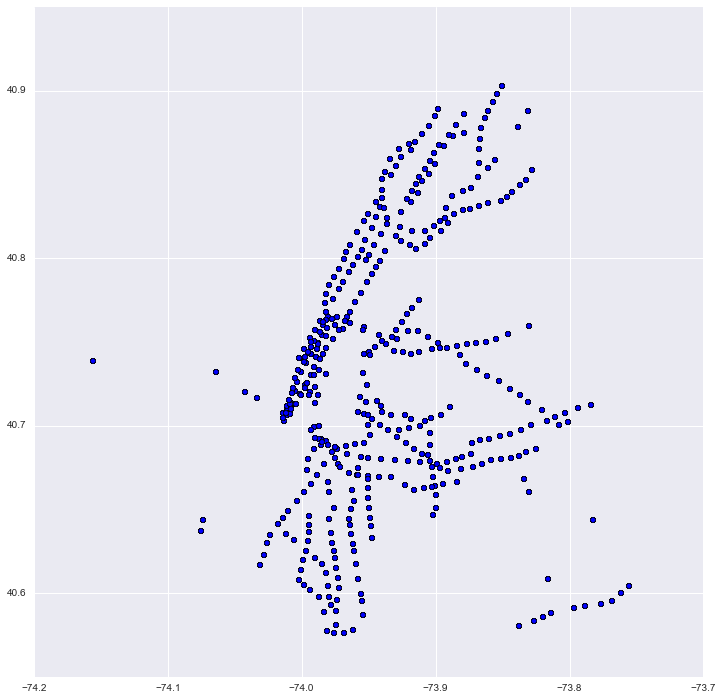

In [35]:
plt.figure(figsize=(12, 12))
plt.scatter(fresh_df.LONG,fresh_df.LAT);

# sns.factorplot(x="LAT", y="LONG", data=fresh_df)

In [36]:
search_wiki = wikipedia.search("BMT CORTLANDT ST (New York City Subway)")
search_wiki

['J/Z (New York City Subway service)',
 'New York City Subway',
 'Cortlandt Street (BMT Broadway Line)',
 'N (New York City Subway service)',
 '14th Street – Union Square (New York City Subway)',
 'BMT Broadway Line',
 'R (New York City Subway service)',
 'New York City Subway stations',
 'BMT Nassau Street Line',
 'List of New York City Subway lines']

In [37]:
import wikipedia
# print(wikipedia.summary("ATL AV-BARCLAY NYC"))


# alt_ave = wikipedia.search("Atlantic Avenue (New York City)")
# # [u'Barak (given name)', u'Barack Obama', u'Barack (brandy)', u'Presidency of Barack Obama', u'Family of Barack Obama', u'First inauguration of Barack Obama', u'Barack Obama presidential campaign, 2008', u'Barack Obama, Sr.', u'Barack Obama citizenship conspiracy theories', u'Presidential transition of Barack Obama']

alt_ave = wikipedia.page("Atlantic Avenue – Barclays Center (New York City Subway)")
# >>> ny.title
# # u'New York'
# >>> ny.url
# # u'http://en.wikipedia.org/wiki/New_York'
# >>> ny.content
# # u'New York is a state in the Northeastern region of the United States. New York is the 27th-most exten'...
# >>> ny.links[0]
# # u'1790 United States Census'

# >>> wikipedia.set_lang("fr")
# >>> wikipedia.summary("Facebook", sentences=1)
# # Facebook est un service de réseautage social 

In [38]:
alt_ave.section

<bound method WikipediaPage.section of <WikipediaPage 'Atlantic Avenue – Barclays Center (New York City Subway)'>>

In [40]:
pd.crosstab(error['C/A'],error['UNIT']).T

C/A,A049,A077,A081,A082,N095A,N098,N330,R101,R169,R550,R612
UNIT,,,,,,,,,,,
R001,0,0,0,0,0,0,0,630,0,0,0
R014,0,0,0,0,559,0,0,0,0,0,0
R028,0,168,294,168,0,491,0,0,0,0,0
R057,0,0,0,0,0,0,0,0,0,0,672
R072,0,0,0,0,0,0,0,0,0,756,0
R088,624,0,0,0,0,0,0,0,0,0,0
R168,0,0,0,0,0,0,0,0,672,0,0
R202,0,0,0,0,0,0,378,0,0,0,0


In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.crosstab(error['C/A'],error['UNIT']).T, linewidths=1)

In [ ]:
error[error['C/A'].str.contains("A04")].head()

In [ ]:
turnsile[turnsile['C/A'].str.contains("A049")].head()

In [ ]:
turnsile[turnsile['UNIT'].str.contains("R086")].head()

In [ ]:
geodata[geodata['UNIT'].str.contains("R086")].head()

In [ ]:
geodata[geodata['C/A'].str.contains("R086")].head()

In [41]:
import geopandas as gp

In [42]:
ny_subway_json = gp.read_file("./ny_subway_stations.geojson")

In [43]:
for i in ny_subway_json.name:
    search  = search_wikipedia(i)
    print(search)
    print()

Smith St & Bergen St At Ne Corner (To Manhattan And Queens Only) (New York City Subway)
['Bergen Street (IND Culver Line)', 'Transportation in New York City', 'The Bronx', 'Gateway Project']

['Bergen Street (IND Culver Line)', 'Transportation in New York City', 'The Bronx', 'Gateway Project']

Court St & Montague St At Sw Corner (New York City Subway)
['National Register of Historic Places listings in Kings County, New York', 'South Ferry – Whitehall Street (New York City Subway)', 'History of Halifax (former city)']

['National Register of Historic Places listings in Kings County, New York', 'South Ferry – Whitehall Street (New York City Subway)', 'History of Halifax (former city)']

Court St & Montague St At Sw Corner (New York City Subway)
['National Register of Historic Places listings in Kings County, New York', 'South Ferry – Whitehall Street (New York City Subway)', 'History of Halifax (former city)']

['National Register of Historic Places listings in Kings County, New York', 

KeyboardInterrupt: 

In [53]:
ny_subway_json.head()

,geometry,line,name,url
0,POINT (-73.99027199929638 40.68672833129772),F-G,Smith St & Bergen St At Ne Corner (To Manhatta...,http://www.mta.info/nyct/service/
1,POINT (-73.9906780008789 40.69372533216928),2-3-4-5-N-R,Court St & Montague St At Sw Corner,http://www.mta.info/nyct/service/
2,POINT (-73.99059199905471 40.69364233162101),2-3-4-5-N-R,Court St & Montague St At Sw Corner,http://www.mta.info/nyct/service/
3,POINT (-73.99253735666481 40.69439311951264),2-3-4-5-N-R,Clinton St & Montague St At Nw Corner,http://www.mta.info/nyct/service/
4,POINT (-73.96224891505983 40.66272735822238),B-Q-S,Flatbush Ave & Empire Blvd At Sw Corner,http://www.mta.info/nyct/service/


In [117]:
test_lines = [i.split('-') for i in ny_subway_json['line']]
test_lines

[['F', 'G'],
 ['2', '3', '4', '5', 'N', 'R'],
 ['2', '3', '4', '5', 'N', 'R'],
 ['2', '3', '4', '5', 'N', 'R'],
 ['B', 'Q', 'S'],
 ['D', 'N', 'R'],
 ['D', 'N', 'R'],
 ['D', 'N', 'R'],
 ['2', '3', '4'],
 ['N', 'R'],
 ['N', 'R'],
 ['2', '3'],
 ['2', '3'],
 ['2', '3'],
 ['2', '3'],
 ['N', 'R'],
 ['N', 'R'],
 ['B', 'D', 'N', 'Q', 'R'],
 ['2', '3', '4', '5', 'B', 'D', 'N', 'Q', 'R'],
 ['2', '3', '4', '5', 'B', 'D', 'N', 'Q', 'R'],
 ['N', 'R'],
 ['F', 'G'],
 ['2', '3', '4'],
 ['2', '3', '4'],
 ['2', '3', '4', '5', 'S'],
 ['2', '3', '4', '5', 'S'],
 ['A', 'C', 'S'],
 ['2', '3', '4', '5', 'S'],
 ['F'],
 ['F', 'J', 'M', 'Z'],
 ['B', 'D', 'N', 'Q', 'R'],
 ['A', 'S'],
 ['A', 'C'],
 ['A', 'C'],
 ['2', '3', '4', '5', 'N', 'R'],
 ['F'],
 ['B', 'Q'],
 ['E', 'M', 'R'],
 ['D'],
 ['2', '3', 'A', 'C', 'E'],
 ['A', 'C'],
 ['F'],
 ['E'],
 ['7', 'E', 'F', 'M', 'R'],
 ['J'],
 ['N', 'Q', 'R'],
 ['1', '2', '3'],
 ['1', '2', '3'],
 ['G'],
 ['2', '3', '4', '5', 'A', 'C', 'J', 'Z'],
 ['1', '2', '3'],
 ['J', 'Z'],

In [115]:
subway_colors = {
    "A": "#2850ad",
    "C": "#2850ad",
    "E": "#2850ad",
    "B": "#ff6319",
    "D": "#ff6319",
    "F": "#ff6319",
    "M": "#ff6319",
    "G": "#6cbe45",
    "L": "#a7a9ac",
    "J": "#996633",
    "Z": "#996633",
    "N": "#fccc0a",
    "Q": "#fccc0a",
    "R": "#fccc0a",
    "1": "#ee352e",
    "2": "#ee352e",
    "3": "#ee352e",
    "4": "#00933c",
    "5": "#00933c",
    "6": "#00933c",
    "6 Express": "#00933c",
    "7": "#b933ad",
    "7 Express": "#b933ad"    
}

In [110]:
import re
pattern = "-"
results = re.sub(pattern, "", "F-G-N-R")
print(results)

pattern = "NR"
print(re.sub(pattern, "", results))

bool(re.search(r'[A]', results))

FGNR
FG


False

In [92]:
ny_subway_json.line.str.replace("([/d])", "").head()

0            F-G
1    2-3-4-5-N-R
2    2-3-4-5-N-R
3    2-3-4-5-N-R
4          B-Q-S
Name: line, dtype: object

In [85]:
ny_subway_json.line.str.match("[/d]")

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1874    False
1875    False
1876    False
1877    False
1878    False
1879    False
1880    False
1881    False
1882    False
1883    False
1884    False
1885    False
1886    False
1887    False
1888    False
1889    False
1890    False
1891    False
1892    False
1893    False
1894    False
1895    False
1896    False
1897    False
1898    False
1899    False
1900    False
1901    False
1902    False
1903    False
Name: line, dtype: bool

In [70]:
ny_subway_json.line.str.match("([R])")

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


0       []
1       []
2       []
3       []
4       []
5       []
6       []
7       []
8       []
9       []
10      []
11      []
12      []
13      []
14      []
15      []
16      []
17      []
18      []
19      []
20      []
21      []
22      []
23      []
24      []
25      []
26      []
27      []
28      []
29      []
        ..
1874    []
1875    []
1876    []
1877    []
1878    []
1879    []
1880    []
1881    []
1882    []
1883    []
1884    []
1885    []
1886    []
1887    []
1888    []
1889    []
1890    []
1891    []
1892    []
1893    []
1894    []
1895    []
1896    []
1897    []
1898    []
1899    []
1900    []
1901    []
1902    []
1903    []
Name: line, dtype: object

In [71]:
ny_subway_json.line.str.replace("([^0-9a-zA-Z]+)", '')

0                        FG
1                    2345NR
2                    2345NR
3                    2345NR
4                       BQS
5                       DNR
6                       DNR
7                       DNR
8                       234
9                        NR
10                       NR
11                       23
12                       23
13                       23
14                       23
15                       NR
16                       NR
17                    BDNQR
18                2345BDNQR
19                2345BDNQR
20                       NR
21                       FG
22                      234
23                      234
24                    2345S
25                    2345S
26                      ACS
27                    2345S
28                        F
29                     FJMZ
               ...         
1874                    123
1875                    ACE
1876                    ACE
1877                    ACE
1878                

In [73]:
sample_search = search_wikipedia('(New York City Subway)')

(New York City Subway) (New York City Subway)
['Union Square', 'Grand Central Station (disambiguation)', 'Jay Street', 'Grand Central', 'List of closed New York City Subway stations', 'Jamaica (disambiguation)', 'Ninth Street (disambiguation)', 'Signaling of the New York City Subway', 'List of New York City Subway services', 'Abandoned railway station']



In [74]:
sample_search

['Union Square',
 'Grand Central Station (disambiguation)',
 'Jay Street',
 'Grand Central',
 'List of closed New York City Subway stations',
 'Jamaica (disambiguation)',
 'Ninth Street (disambiguation)',
 'Signaling of the New York City Subway',
 'List of New York City Subway services',
 'Abandoned railway station']

In [57]:
courtland = wikipedia.page('Cortlandt Street (BMT Broadway Line)')

In [72]:
wikipedia.

(Decimal('40.7107349999999996725819073617458343505859375'),
 Decimal('-74.011245000000002391971065662801265716552734375'))

In [ ]:
clean_data.head()

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(clean_data.LONG,clean_data.LAT, c=clean_data.ENTRIES, alpha=.5)

In [ ]:
import geocoder
g = geocoder.google('Mountain View, CA')
g.latlng

In [ ]:
clean_data[clean_data.STATION_x == 'FULTON ST']

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
fuzz.ratio("hello", "hi")